# Polymer scaling map analysis
This analysis generates Fig. 4E of Boeynaems et al.

#### Requirements
This notebook requires:

1. matplotlib
2. numpy 

And then four packages developed by the Holehouse lab

1. [soursop](https://soursop.readthedocs.io/) - a simulation analysis package. For [docs click here](https://soursop.readthedocs.io/) and for the preprint [click here](https://www.biorxiv.org/content/10.1101/2023.02.16.528879v1).

2. [afrc](https://afrc.readthedocs.io/) - a package for calculating a sequence-specific polymer models. For [docs click here](https://afrc.readthedocs.io/) and for the preprint [click here](). 

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


# special imports for scaling maps!
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# install as per :https://github.com/idptools/sparrow
from sparrow import Protein
from soursop.sstrajectory import SSTrajectory

# install as per 
from afrc import AnalyticalFRC

In [3]:
pdb = SSTrajectory('traj/lammps_fixed_traj.pdb','traj/lammps_fixed_traj.pdb').proteinTrajectoryList[0]


## the code below lets you recalculate the polymer scaling map from the trajectory. HOWEVER, we pre-computed it
# so you don't have to!

# get and calculate the polymer scaling map. This takes a hot second because the simulation is big
#traj = SSTrajectory('traj/lammps_fixed_traj.xtc','traj/lammps_fixed_traj.pdb').proteinTrajectoryList[0]
#scaling_map = traj.get_polymer_scaled_distance_map(mode='signed-fractional-change')[0]

scaling_map = np.loadtxt('data/polymer_deviation_map_fractional.csv', delimiter=',')
seq = pdb.get_amino_acid_sequence(oneletter=True)

In [4]:
# define some points
start = 477
pivot_point = 909

### Plot the polymer scaling map
Generate Fig 4E.

meta NOT subset; don't know how to subset; dropped


477


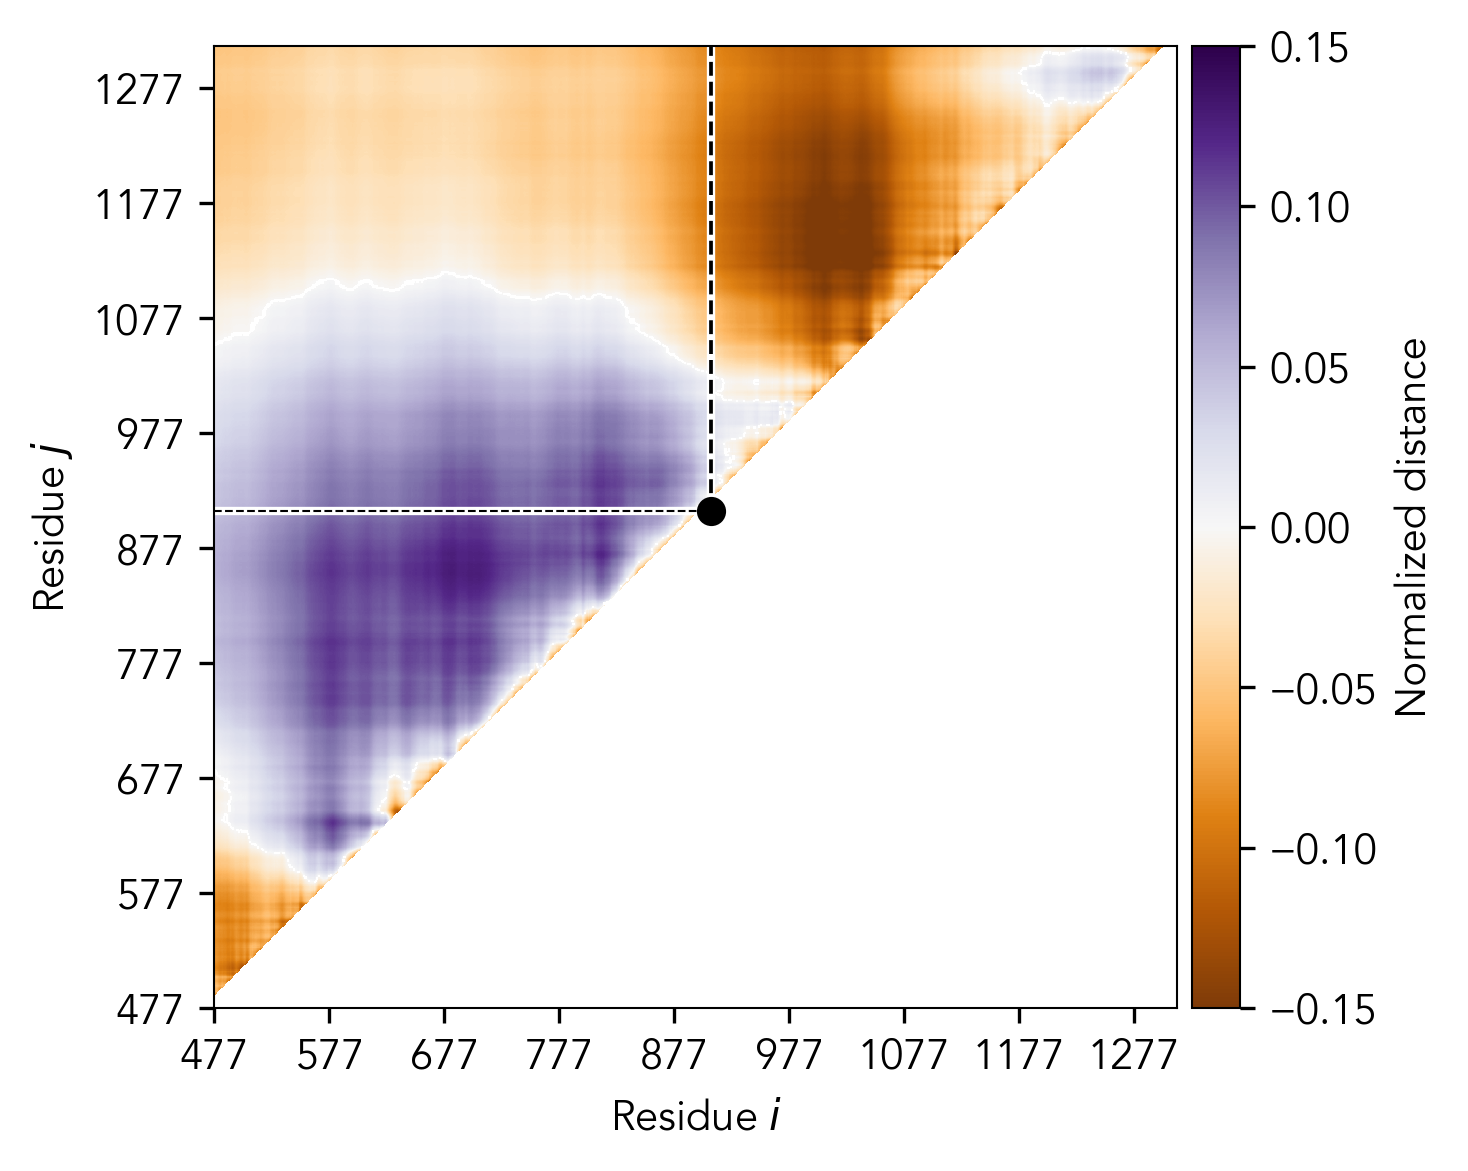

In [6]:
fig = figure(num=None, figsize=(5, 5), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes


# we define max extent for using plt.imshow. This basically sets the number of residues
max_extent = scaling_map.shape[0]


# transpose this so the final figures follow convention
scaling_map_tranposed = scaling_map.transpose()

# we build a masked array for figure generation
masked_array = np.ma.masked_where(scaling_map_tranposed == 0, scaling_map_tranposed)

## By convention we also want to create a color map that is reflective around 0 but also
# shows the 'bad' values as white. Bad here just reflects values where we don't have data (i.e.) bottom
# right triangle of the evntual figure
# create a copy of the colormap

# the defauly colourmap we use s seismic, but, there are MANY possible options - see
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = copy.copy(matplotlib.cm.get_cmap("PuOr"))
cmap.set_bad(color='white')

# generate the figure! The main thing you may want to mess with here are vmax and vmin, which define the range
# over which the color scheme is defined. In a perfect world white = 1.0 and blue < 1 and red > 1, BUT sometims
# this isn't feasible, in which case a linear color map (i.e. blue to red) might be preferable. Use your discretion 
# here as needed!



im = plt.imshow(masked_array,cmap=cmap, interpolation='bilinear',
                   origin='lower', extent=[start, start+max_extent, start, start+max_extent],
                   vmax=0.15, vmin=-0.15)


plt.xlabel('Residue $i$')
plt.ylabel('Residue $j$')



# by defaulty we show tickmarks every 20 residues, but, YMMV in terms of what works best for your data
plt.xticks(np.arange(start, start+scaling_map.shape[0]+1, 100),fontsize=10)
plt.yticks(np.arange(start, start+scaling_map.shape[0]+1, 100),fontsize=10)

plt.xlim([start, start+max_extent])
plt.ylim([start, start+max_extent])

print(start)



plt.plot([pivot_point,pivot_point],[pivot_point-1,max_extent+start], '-w', linewidth=2)
plt.plot([pivot_point,pivot_point],[pivot_point-1,max_extent+start], '--k', linewidth=0.9)


plt.plot([start,pivot_point], [pivot_point,pivot_point],'-w', linewidth=2)
plt.plot([start,pivot_point], [pivot_point,pivot_point],'--k', linewidth=0.5)

plt.plot([pivot_point],[pivot_point],'ok')


ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label('Normalized distance')

# include this to stop matplotlib being dumb and chopping off axes info...
plt.tight_layout()


plt.savefig('figures/scaling_map_1.pdf')


    

## Scaling exponent fit
The cell below loads fits to a homopolymer model - this is the model used to noralize intra-residue distances, and while we don't include the analysis below in the paper, for completeness it's provided here.

In [12]:
# load data
scaling_exp_fit = np.loadtxt('data/scaling_exp_fit_power.csv', delimiter=',').transpose()
nu_info = np.loadtxt('data/scaling_exp_analysis_power.csv')

idx = scaling_exp_fit[0]
sim_data = scaling_exp_fit[1]
fit_data = scaling_exp_fit[2]

print('The polymer model fit has the following functional form:\n')
print(f"Rij = {round(nu_info[1],2)}*N^{round(nu_info[0],3)}\n")

The polymer model fit has the following functional form:

Rij = 6.58*N^0.519



meta NOT subset; don't know how to subset; dropped


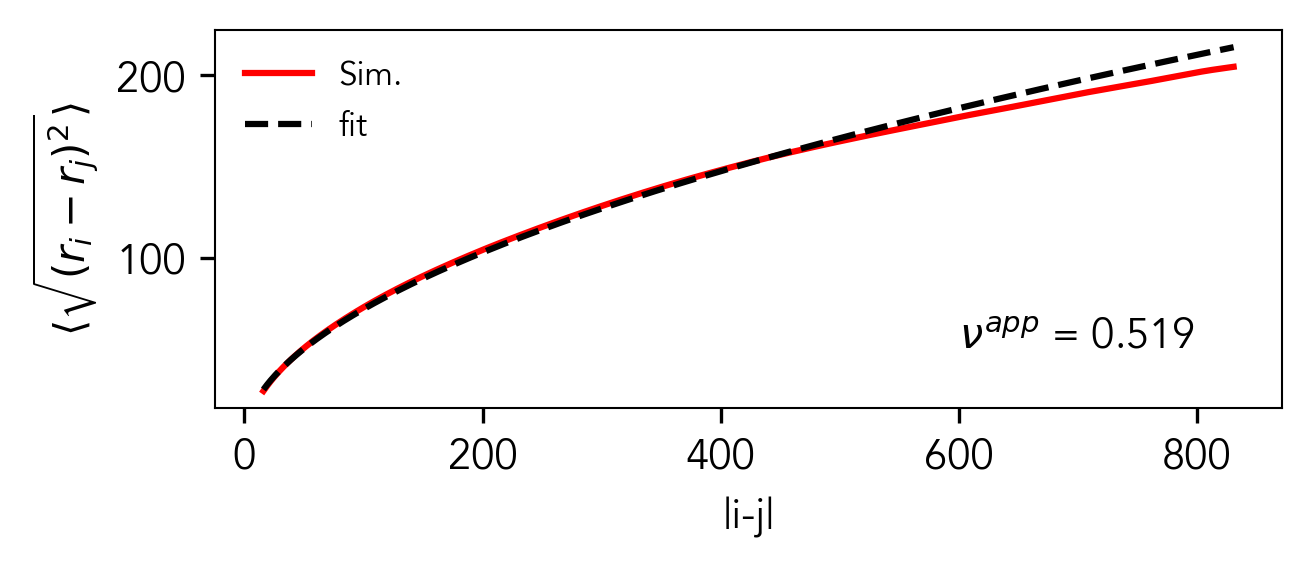

In [13]:
# If this 
#
#

fig = figure(num=None, figsize=(4.5, 2), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

plt.plot(idx, sim_data,'-r', ms=3, mfc='r',mew=0.3,label='Sim.')
plt.plot(idx, fit_data,'--k', label='fit')
plt.xlabel('|i-j|')
plt.ylabel(r'$\langle \sqrt{(r_i - r_j)^{2}} \rangle$')
plt.legend(fontsize=8,frameon=False)
plt.text(600,50, r"$\nu^{app}$ = " + str(np.round(nu_info[0],3)))


plt.tight_layout()
plt.savefig('figures/scaling_fit.pdf')



meta NOT subset; don't know how to subset; dropped


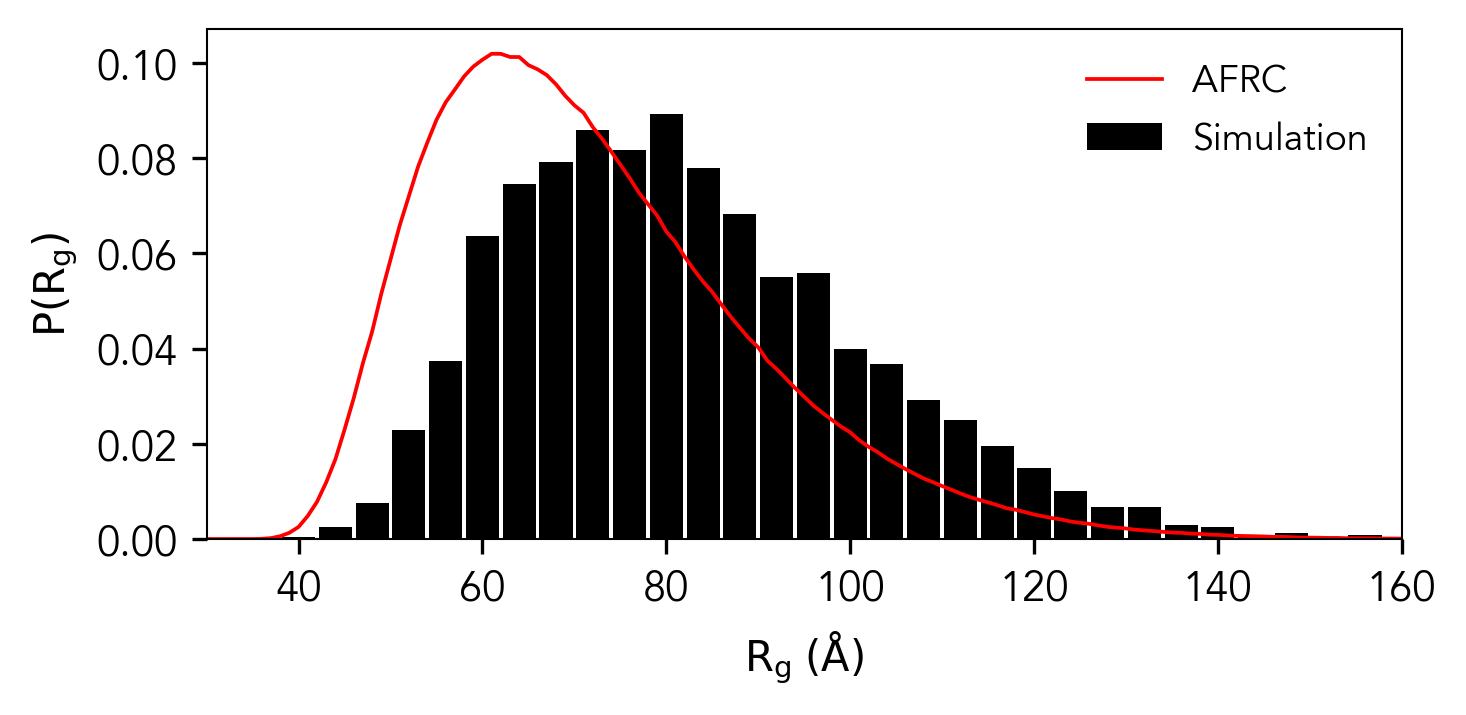

In [40]:
fig = figure(num=None, figsize=(5, 2.5), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

rg = np.loadtxt('data/RG.csv')

binwidth=4
bins_raw = np.arange(0,170,binwidth)
[a,b] = np.histogram(rg,bins=bins_raw)
plt.bar(bins_raw[:-1], a/np.sum(a), width=binwidth*0.9, color='black', label='Simulation')

afrc_rg = AnalyticalFRC(seq).sample_radius_of_gyration_distribution(n=5000000)

afrc_binwidth=1
afrc_bins_raw = np.arange(0,170,afrc_binwidth)

bin_height_correction = binwidth/afrc_binwidth


[afrc_a,afrc_b] = np.histogram(afrc_rg, bins=afrc_bins_raw)

plt.plot(afrc_bins_raw[:-1],bin_height_correction*(afrc_a/np.sum(afrc_a)), '-r', linewidth=0.9, label='AFRC')

plt.xlim([30,160])
#plt.ylim([0,250])
plt.xlabel(r'$\rm{R_g}$ $(\rm{\AA})$')
plt.ylabel(r'$\rm{P(R_g)}$')
plt.legend(fontsize=9, frameon=False)

plt.tight_layout()
plt.savefig('figures/rg_dist.pdf')


meta NOT subset; don't know how to subset; dropped


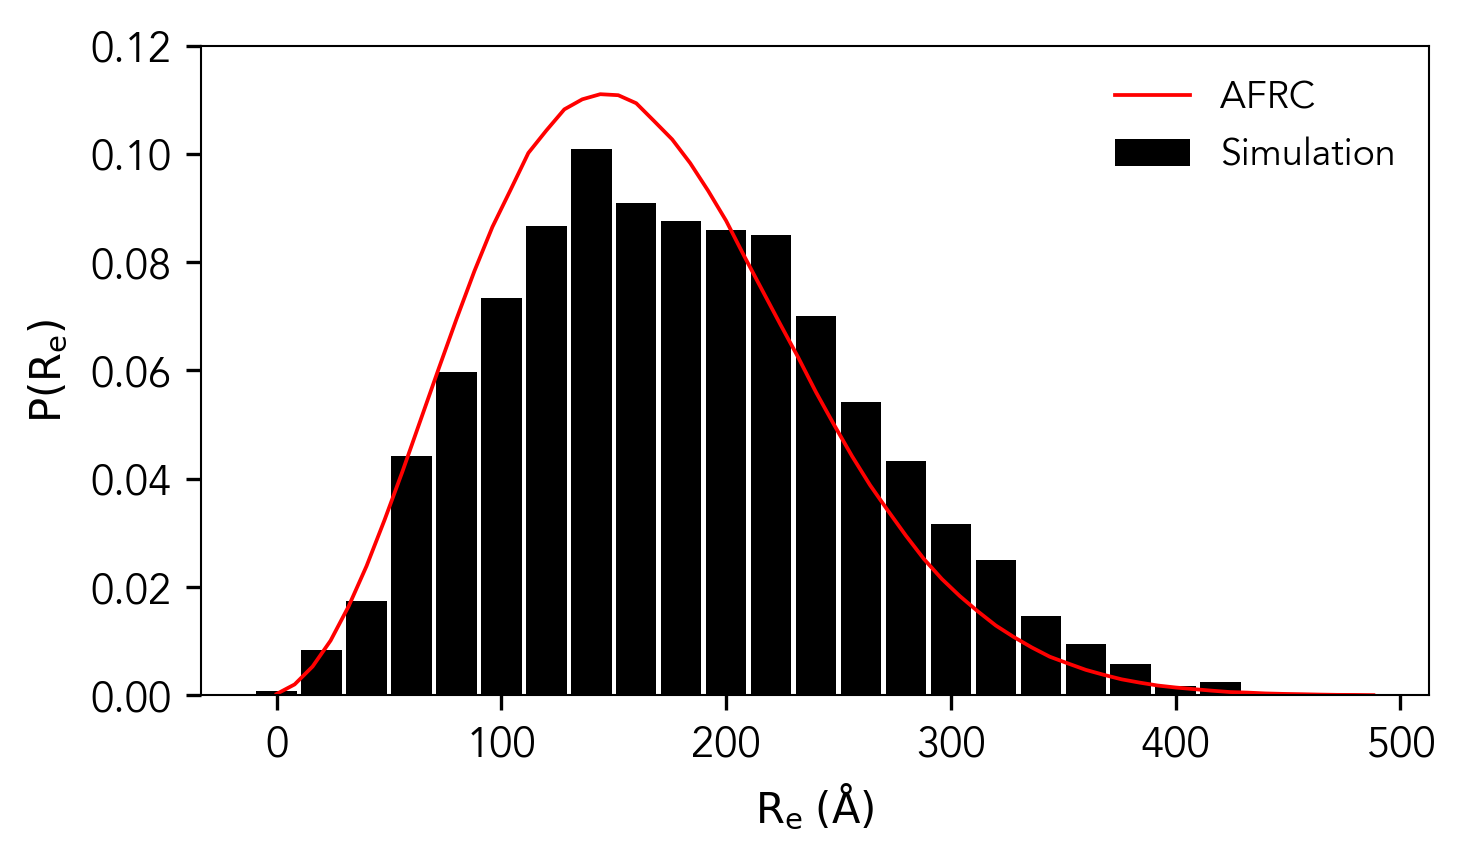

In [41]:
fig = figure(num=None, figsize=(5, 3), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

re = np.loadtxt('data/end_to_end.csv')
afrc_re = AnalyticalFRC(seq).sample_end_to_end_distribution(n=5000000)

binwidth=20

bins_raw = np.arange(0,500,binwidth)
[a,b] = np.histogram(re,bins=bins_raw)
plt.bar(bins_raw[:-1],a/np.sum(a), width=binwidth*0.9, color='black', label='Simulation')

afrc_binwidth=8
afrc_bins_raw = np.arange(0,500,afrc_binwidth)

bin_height_correction = binwidth/afrc_binwidth

[afrc_a,afrc_b] = np.histogram(afrc_re, bins=afrc_bins_raw)
plt.plot(afrc_bins_raw[:-1],bin_height_correction*(afrc_a/np.sum(afrc_a)), '-r', linewidth=0.9, label='AFRC')



#plt.xlim([30,160])
plt.ylim([0,0.12])
plt.xlabel(r'$\rm{R_e}$ $(\rm{\AA})$')
plt.ylabel(r'$\rm{P(R_e)}$')
plt.legend(fontsize=9, frameon=False)

plt.tight_layout()
plt.savefig('figures/re_dist.pdf')



(0.0, 2400.0)

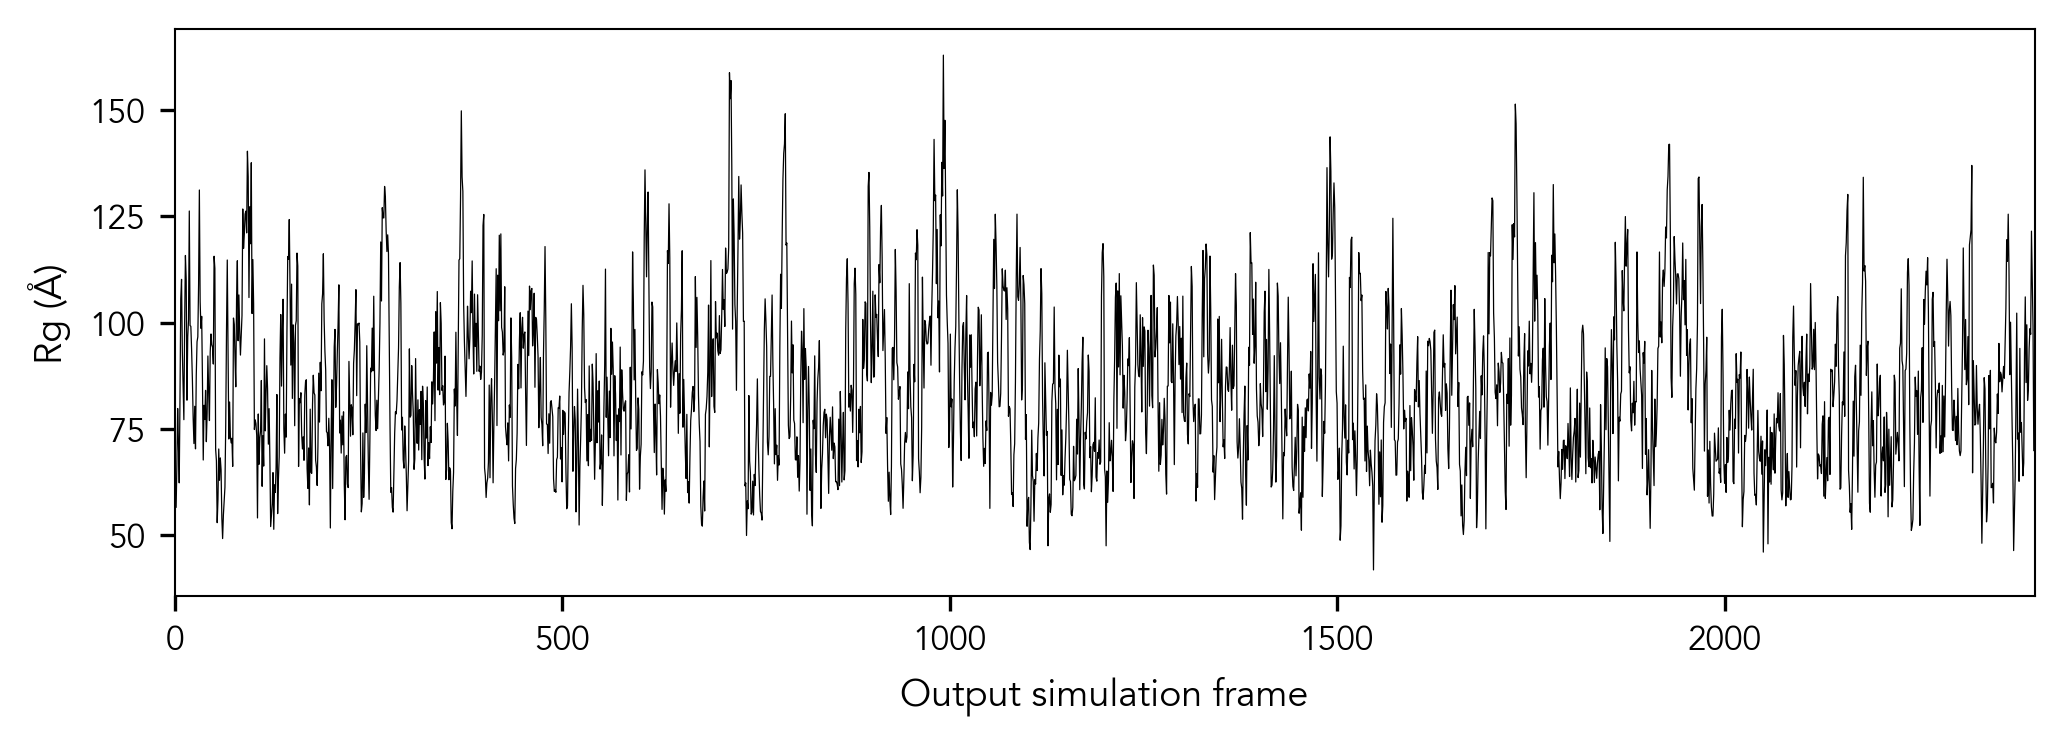

In [8]:
fig = figure(num=None, figsize=(8, 2.5), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

rg = np.loadtxt('data/RG.csv')


plt.plot(rg, linewidth=0.3, color='k')
plt.xlabel('Output simulation frame',fontsize=9)
plt.ylabel('Rg (Å)', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
print('')
plt.xlim([0,2400])
